# <center>Metody Numeryczne</center>

# Laboratorium 7: Pierwiastki wielomianu i wartości własne


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych. W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$. Należy wyznaczyć takie jej argumenty $x^*$, dla których zachodzi równość $f(x^*) = 0$. 

Argumenty spełniające powyższe równanie nazywane są *pierwiastkami równania*.

<br>

**Wielomian**

Dany jest wielomian $w(x)$ w postaci kanonicznej (ogólnej):

$$
w(x) = a_nx^n + a_{n-1}x^{n-1} + \ldots + a_2x^2 + a_1x + a_0
$$

jego wektor współczynników wyraża się wzorem:

$$
\mathbf{a} = (a_0, a_1, ..., a_{n-1}, a_n)
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`,
    - `nppoly` - `numpy.polynomial.polynomial`.

---

In [34]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as nppoly
from scipy.linalg import schur


---

### **Zadanie 1.**

Dane są wielomiany w postaci iloczynowej:
$$
\begin{align*}
w_1(x) &= (x-1)(x-2)(x-3)\\
w_2(x) &= (x-1)(x-2) \cdot \ldots \cdot (x-20)
\end{align*}
$$

**Punkt 1.**

1. Oblicz wektor współczynników $\mathbf{a}_1$ wielomianu $w_1(x)$ w postaci kanonicznej dla zadanego wektora pierwiastków.

2. Sprawdź poprawność wyznaczonego wektora z definicją w sekcji **Cel zajęć**.

> **Wskazówka:** Użyj funkcji [`nppoly.polyfromroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyfromroots.html).

<br>

**Punkt 2.**

Zaimplementuj funkcję *`roots_20()`* wyznaczającą miejsca zerowe wielomianu na podstawie jego wektora współczynników. Funkcja powinna najpierw lekko zaburzać wejściowe współczynniki za pomocą dodania do nich losowej wartości postaci: $N(0,1) \cdot 1\mathrm{e}{-10}$.

> **Wskazówka:** Użyj funkcji [`np.random.random_sample()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random_sample.html) oraz [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

1. Wyznacz wektor współczynników $\mathbf{a}_2$ wielomianu $w_2(x)$.

2. W pętli 20 iteracji:
    
    1. Wyznacz pierwiastki zaburzonego wielomianu używając *`roots_20()`*.

    2. Ustaw zaburzony wektor współczynników jako nowy wektor współczynników.

    3. Wyrysuj na jednym wykresie wyznaczone części rzeczywiste pierwiastków, a na drugim części urojone (w każdej iteracji dorysowuj pierwiastki na tym samym rysunku).

4. Określ, które pierwiastki są najbardziej wrażliwe na zaburzenia oraz opisz wnioski wynikające z utworzonego wykresu.

5. Zaproponuj sposób oszacowania uwarunkowania każdego z pierwiastków.


[-6. 11. -6.  1.]
[0. 0. 0.]


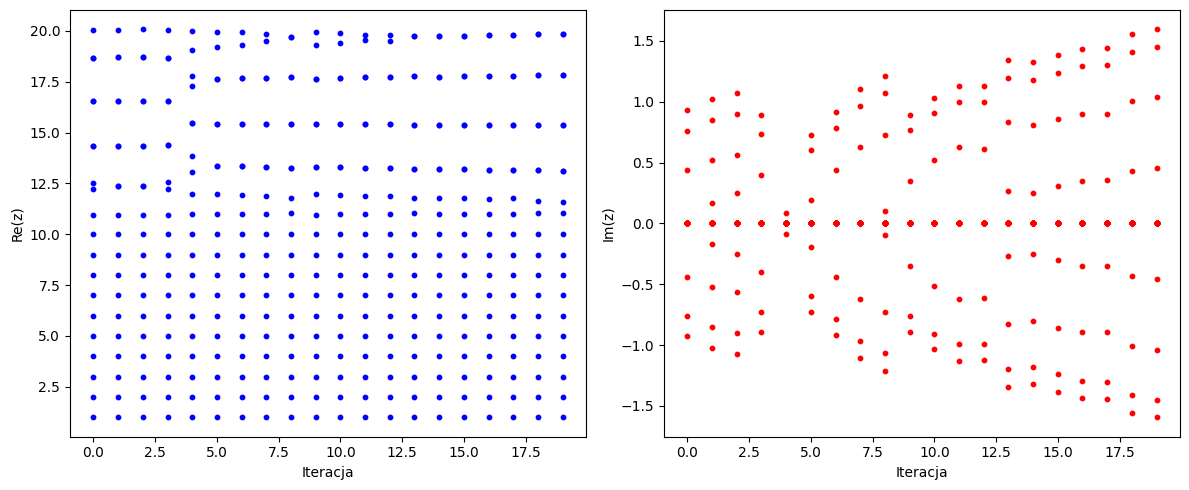

In [35]:
# ===== Twoja implementacja tutaj =====

# ---
import numpy as np
import numpy.polynomial.polynomial as nppoly

roots_w1 = np.array([1, 2, 3])
a1 = nppoly.polyfromroots(roots_w1)
print(a1)
print(nppoly.polyval(roots_w1, a1))

# ---
def roots_20(coeffs):
    perturbation = (np.random.random_sample(coeffs.shape) - 0.5) * 2e-10
    perturbed_coeffs = coeffs + perturbation
    return nppoly.polyroots(perturbed_coeffs)

# ---
import matplotlib.pyplot as plt

roots_w2 = np.arange(1, 21)
a2 = nppoly.polyfromroots(roots_w2)
coeffs = a2.copy()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.xlabel("Iteracja")
plt.ylabel("Re(z)")
plt.subplot(1,2,2)
plt.xlabel("Iteracja")
plt.ylabel("Im(z)")

for i in range(20):
    r = roots_20(coeffs)
    coeffs = nppoly.polyfromroots(r)
    
    plt.subplot(1,2,1)
    plt.scatter([i]*len(r), r.real, color='blue', s=10)
    
    plt.subplot(1,2,2)
    plt.scatter([i]*len(r), r.imag, color='red', s=10)

plt.tight_layout()
plt.show()


---

### **Zadanie 2.**

Na podstawie wiedzy z wykładu wiadomo, że wartości własne macierzy kwadratowej są pierwiastkami wielomianu charakterystycznego tej macierzy oraz, że każdy wielomian posiada swoją macierz stowarzyszoną (macierz Frobeniusa). Wynika z tego, że **poszukiwanie pierwiastków wielomianu jest równoważne poszukiwaniu wartości własnych macierzy stowarzyszonej**.

<br>

Dany jest wielomian:
$$
w_3(x) = (x-1)^8
$$ 

Należy wyznaczyć numerycznie jego miejsca zerowe na różne sposoby i porównać otrzymane wyniki z wartościami analitycznymi.

**Punkt 1.**

Przygotowanie macierzy stowarzyszonej.

1. Zaiplementuj funkcję *`frob_a()`* tworzącą [macierz Frobeniusa](https://en.wikipedia.org/wiki/Companion_matrix) dla zadanego wektora współczynników wielomianu.

2. Wyznacz macierz Frobeniusa $\mathbf{F_{w_3}}$ dla wielomianu $w_3(x)$.

<br>

**Punkt 2.**

Wyznaczenie pierwiastków wielomianu.

1. Wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$ za pomocą funkcji [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html).  

2. Dokonaj rozkładu Schura macierzy $\mathbf{F_{w_3}}$ i na tej podstawie wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$. Użyj funkcji [`sp.linalg.schur()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.schur.html).

3. Wyznacz pierwiastki wielomianu $w_3(x)$ przy użyciu funkcji [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

Zestawienie wyników.

1. Utwórz wykres typu *scatter plot* i wyrysuj na nim wartości pierwiastków wyznaczonych w **Punkcie 2.** oraz pierwiastki oblicznone analitycznie na płaszczyźnie zespolonej.

2. Opisz wnioski wynikające z wykresu.

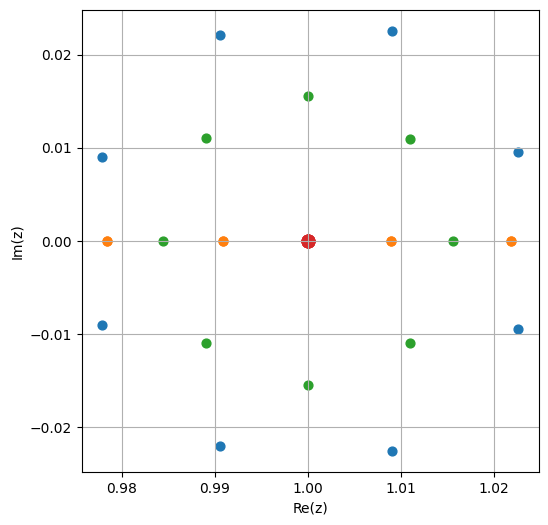

In [36]:
# ===== Twoja implementacja tutaj =====
def frob_a(a):
    n = len(a) - 1
    F = np.zeros((n, n))
    F[1:, :-1] = np.eye(n-1)
    F[:, -1] = -a[:-1] / a[-1]
    return F

# ---
roots = np.array([1]*8)
a3 = nppoly.polyfromroots(roots)
F = frob_a(a3)

# ---
eig1 = np.linalg.eigvals(F)

T, Z = sp.linalg.schur(F)
eig2 = np.diag(T)

eig3 = nppoly.polyroots(a3)

# ---
analytic = np.array([1]*8)

plt.figure(figsize=(6,6))
plt.scatter(eig1.real, eig1.imag, s=40)
plt.scatter(eig2.real, eig2.imag, s=40)
plt.scatter(eig3.real, eig3.imag, s=40)
plt.scatter(analytic.real, analytic.imag, s=80)

plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.gca().set_aspect("equal", "box")
plt.grid(True)
plt.show()

---

### **Zadanie 3.**

Dany jest wielomian:
$$
w_4(x) = 243x^7 - 486x^6 + 783x^5 - 990x^4 + 558x^3 - 28x^2 - 72x + 16
$$ 

1. Wyznacz numerycznie miejsca zerowe wielomianu $w_4(x)$ w sposób analogiczny jak w **Zadaniu 2.**

2. Wyrysuj na płaszczyźnie zespolonej wyznaczone pierwiastki oraz pierwiastki wyliczone analitycznie.

3. Porównaj otrzymane wyniki z rezulatatami otrzymanymi w **Zadaniu 2.**

>**Wskazówka:** Sprawdź poprawność wyznaczonego wektora współczynników z definicją w sekcji **Cel zajęć**.

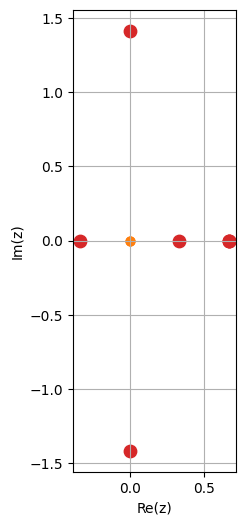

In [37]:
# ===== Twoja implementacja tutaj =====
# ---
coeffs_desc = np.array([243, -486, 783, -990, 558, -28, -72, 16], float)
a4 = coeffs_desc[::-1]

F4 = frob_a(a4)

eig_vals = np.linalg.eigvals(F4)
T, Z = sp.linalg.schur(F4)
eig_schur = np.diag(T)
roots_poly = nppoly.polyroots(a4)
roots_np = np.roots(coeffs_desc)

# ---
plt.figure(figsize=(6,6))
plt.scatter(eig_vals.real, eig_vals.imag, s=40)
plt.scatter(eig_schur.real, eig_schur.imag, s=40)
plt.scatter(roots_poly.real, roots_poly.imag, s=40)
plt.scatter(roots_np.real, roots_np.imag, s=80)

plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.gca().set_aspect("equal")
plt.grid()
plt.show()


---

### **Zadanie 4.**

Zadanie polega na przeanalizowaniu w jaki sposób różne przekształcenia macierzy wpływają na pojawianie się błędów numerycznych.

W celu przeprowadzenia analizy skonstruuj trzy macierze diagonalne $\mathbf{A}_n$ dla $n = \{10,20,30\}$. Współczynniki macierzy powinny być zdefiniowane jako $a_{ii} = 2^i$ dla $i = \{1,2,...,n\}$ (skorzystaj z funkcji [`np.diag()`](https://numpy.org/doc/stable/reference/generated/numpy.diag.html)).

**Punkt 1.**

1. Dla każdej z macierzy $\mathbf{A}_n$ oblicz wartości własne przy użyciu [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html) i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 2.**

1. Zdefiniuj funcję *`is_nonsingular()`* sprawdzającą czy zadana macierz nie jest singularna. 

2. Skonstruuj losowe niesingularne macierze wektorów własnych $\mathbf{P}_n$, których wartości współczynników są liczbami całkowitymi z zakresu $(0,100)$. Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{P}_n$ oblicz macierze $\mathbf{B}_n$ postaci: 
$$
\mathbf{B}_n = \mathbf{P}_n\mathbf{A}_n\mathbf{P}_{n}^{-1}
$$ 

3. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{B}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

>**Wskazówka:** Niesingularność macierzy $\mathbf{P}_n$ można zapewnić generując je w pętli, w której warunkiem stopu będzie wynik funkcji zaimplementowanej w **Podpunkcie 1.**

<br>

**Punkt 3.**

1. Bazując na macierzach $\mathbf{P}_n$ wygeneruj macierze ortogonalne $\mathbf{Q}_n$ (można do tego użyć rozkładu QR). Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{Q}_n$ oblicz macierze $\mathbf{C}_n$ postaci:
$$
\mathbf{C}_n = \mathbf{Q}_n\mathbf{A}_n\mathbf{Q}_{n}^{-1}
$$

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{C}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 4.**

1. Bazując na analitycznych wartościach własnych dla wielomianów charakterystycznych macierzy $\mathbf{A}_n$ wygeneruj macierze Frobeniusa $\mathbf{F}_n$ korzystając z funkcji zaimplementowanej w **Zadaniu 2.** 

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{F}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 5.**

Porównaj wyniki otrzymane we wszystkich punktach. Opisz z czego wynikają powstałe błędy obliczeń.

In [38]:
# ===== Twoja implementacja tutaj =====
def is_nonsingular(M):
    return np.linalg.det(M) != 0

def make_P(n):
    while True:
        P = np.random.randint(0, 100, (n, n))
        if is_nonsingular(P):
            return P

def make_Q(P):
    Q, _ = np.linalg.qr(P.astype(float))
    return Q

def companion_from_eigs(vals):
    n = len(vals)
    poly = np.poly(vals)
    F = np.zeros((n, n))
    F[:-1,1:] = np.eye(n-1)
    F[:,-1] = -poly[1:]
    return F

ns = [10,20,30]

A = {n: np.diag(2**np.arange(1, n+1)) for n in ns}
eigA_num = {n: np.linalg.eigvals(A[n]) for n in ns}
eigA_true = {n: 2**np.arange(1, n+1) for n in ns}

P = {n: make_P(n) for n in ns}
B = {n: P[n] @ A[n] @ np.linalg.inv(P[n]) for n in ns}
eigB = {n: np.linalg.eigvals(B[n]) for n in ns}

Q = {n: make_Q(P[n]) for n in ns}
C = {n: Q[n] @ A[n] @ Q[n].T for n in ns}
eigC = {n: np.linalg.eigvals(C[n]) for n in ns}

F = {n: companion_from_eigs(eigA_true[n]) for n in ns}
eigF = {n: np.linalg.eigvals(F[n]) for n in ns}

eigA_num, eigA_true, eigB, eigC, eigF

({10: array([   2.,    4.,    8.,   16.,   32.,   64.,  128.,  256.,  512.,
         1024.]),
  20: array([2.000000e+00, 4.000000e+00, 8.000000e+00, 1.600000e+01,
         3.200000e+01, 6.400000e+01, 1.280000e+02, 2.560000e+02,
         5.120000e+02, 1.024000e+03, 2.048000e+03, 4.096000e+03,
         8.192000e+03, 1.638400e+04, 3.276800e+04, 6.553600e+04,
         1.310720e+05, 2.621440e+05, 5.242880e+05, 1.048576e+06]),
  30: array([2.00000000e+00, 4.00000000e+00, 8.00000000e+00, 1.60000000e+01,
         3.20000000e+01, 6.40000000e+01, 1.28000000e+02, 2.56000000e+02,
         5.12000000e+02, 1.02400000e+03, 2.04800000e+03, 4.09600000e+03,
         8.19200000e+03, 1.63840000e+04, 3.27680000e+04, 6.55360000e+04,
         1.31072000e+05, 2.62144000e+05, 5.24288000e+05, 1.04857600e+06,
         2.09715200e+06, 4.19430400e+06, 8.38860800e+06, 1.67772160e+07,
         3.35544320e+07, 6.71088640e+07, 1.34217728e+08, 2.68435456e+08,
         5.36870912e+08, 1.07374182e+09])},
 {10: array([   

**Przykładowa forma zestawienia wyników:**
```python
for i, n in enumerate(n_values):
    print(f"   {'Macierz':<18} {'Błąd maksymalny':<18} {'Błąd średni':<18}")
    print(f"   {'-'*55}")
    print(f"   {'A_' + str(n) + ' (diag)':<18} {max_error_A[i]:<18.2e} {mean_error_A[i]:<18.2e}")
    print(f"   {'B_' + str(n) + ' (P*A*P^-1)':<18} {max_error_B[i]:<18.2e} {mean_error_B[i]:<18.2e}")
    print(f"   {'C_' + str(n) + ' (Q*A*Q^T)':<18} {max_error_C[i]:<18.2e} {mean_error_C[i]:<18.2e}")
    print(f"   {'F_' + str(n) + ' (Frobenius)':<18} {max_error_F[i]:<18.2e} {mean_error_F[i]:<18.2e}\n")
```

**Rezultat:**
```md
   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_10 (diag)        0.00e+00           0.00e+00          
   B_10 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_10 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_10 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_20 (diag)        0.00e+00           0.00e+00          
   B_20 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_20 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_20 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_30 (diag)        0.00e+00           0.00e+00          
   B_30 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_30 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_30 (Frobenius)   0.00e+00           0.00e+00
```

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)